In [139]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/housing/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr())

In [67]:
top_features=df.corr()['SalePrice'][abs(df.corr()['SalePrice'])>.6] #most influential features - >.6
#top_features.drop('SalePrice',axis=0,inplace=True) #Sale Price should not be used as a predictor
top_features

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [70]:
feat=top_features.reset_index()['index'].unique()
feat

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'], dtype=object)

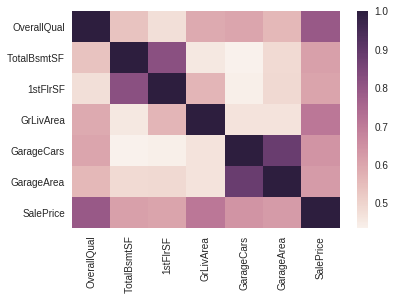

In [71]:
sns.heatmap(df[feat].corr()) #looking to see how related these variables are to each other
#It appears that GarageArea and GarageCars are highly correlated and perhaps only 
#one of these variables should be taken. TotalBasmtSF and 1stFlrSF seem to similarly be closely related

In [79]:
feat

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'], dtype=object)

In [81]:
feat=np.delete(feat,[1,4]) #Remove 'TotalBsmtSF' and 'GarageCars'
feat

array(['OverallQual', '1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice'], dtype=object)

In [73]:
#sns.clustermap(df[feat].corr())

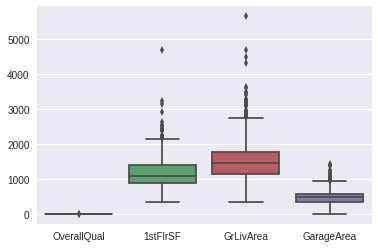

In [84]:
sns.boxplot(data=df[feat].drop('SalePrice',axis=1))
#fig = df[feat].plot()

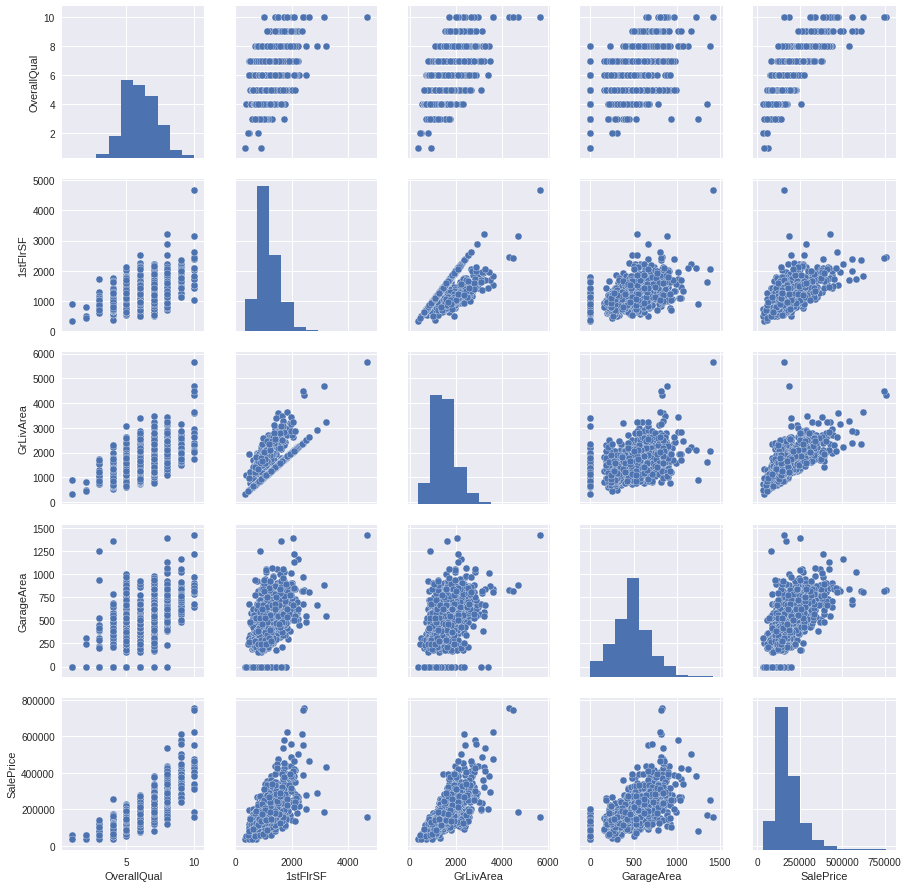

In [85]:
sns.pairplot(df[feat])

In [ ]:
#def reduceQualityNumbers(quality):
#    if quality>8:
#        return 5
    

In [153]:
numbers=np.array([1,2,3,4,5,6,7,8,9,10])
for n in numbers:
    print('{}: {}'.format(n,round(n/3)))

1: 0.0
2: 1.0
3: 1.0
4: 1.0
5: 2.0
6: 2.0
7: 2.0
8: 3.0
9: 3.0
10: 3.0


In [154]:
df['Quality']=df['OverallQual'].apply(lambda x: 1 if x==1 else round(x/3)) #Reduce OverallQual to 1-3

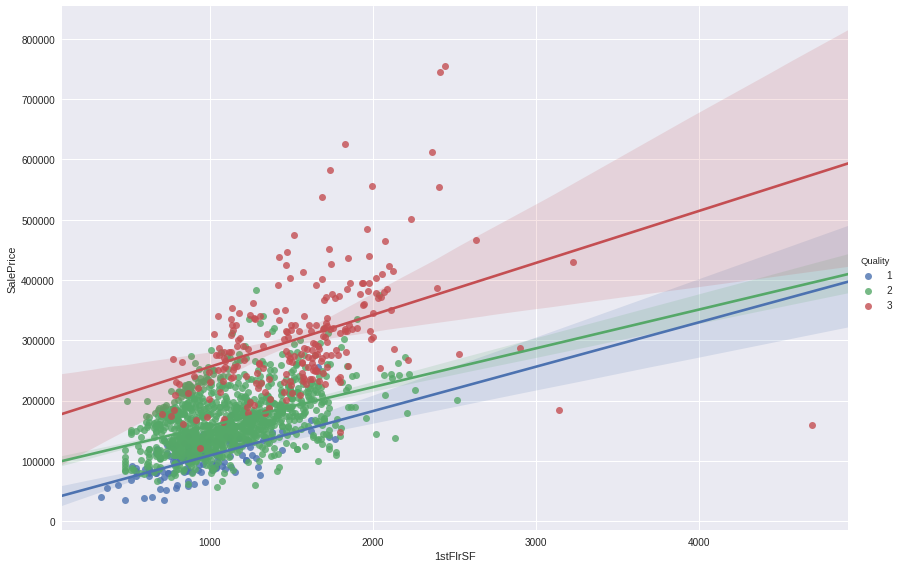

In [174]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=df, hue='Quality', size=8,aspect=1.5)
#plt.ylim(0,1000000)

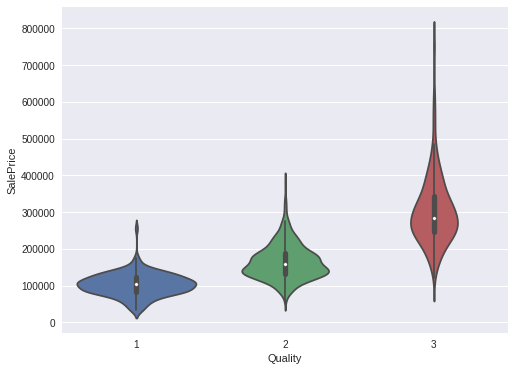

In [181]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Quality',y='SalePrice', data=df)

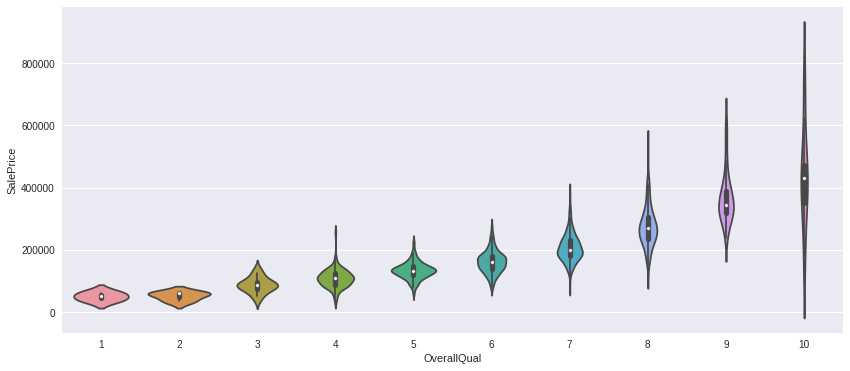

In [185]:
plt.figure(figsize=(14,6))
sns.violinplot(x='OverallQual',y='SalePrice', data=df)

In [210]:
df['OverallQual'].value_counts() #Only 5 value counts of 1 and 2. They may skew results. 
#Consider removing qualities 2 and 3

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

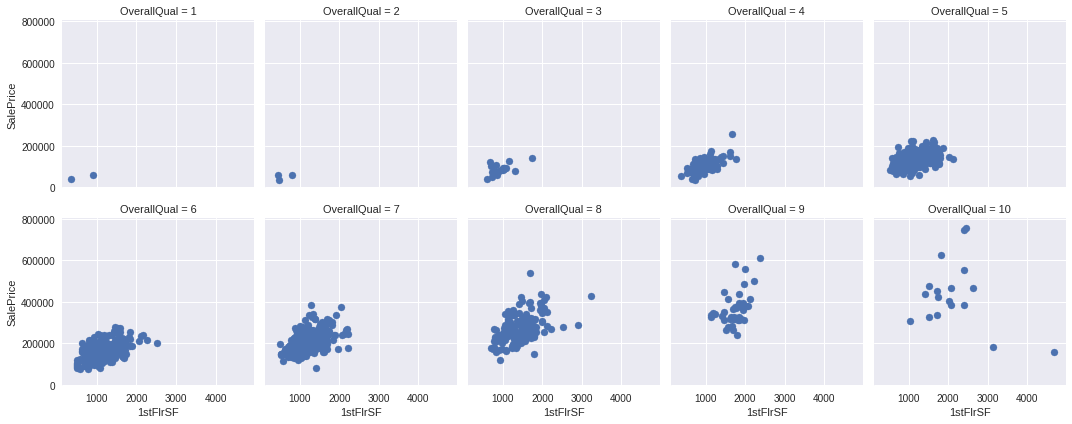

In [205]:
g = sns.FacetGrid(df[feat],col='OverallQual',col_wrap=5)
g =g.map(plt.scatter,'1stFlrSF','SalePrice')

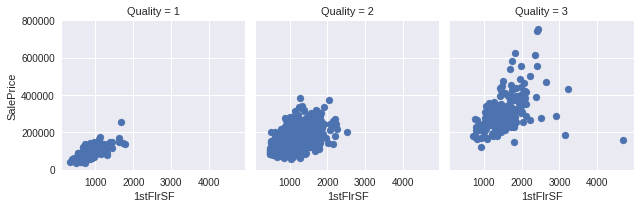

In [219]:
g = sns.FacetGrid(df,col='Quality')
g = g.map(plt.scatter,'1stFlrSF','SalePrice')
#g = g.map(sns.jointplot,'1stFlrSF','SalePrice')

In [109]:
dfr=(df[feat]-df[feat].mean())/df[feat].std()
dfr.head() #standardized to be z-score

,OverallQual,1stFlrSF,GrLivArea,GarageArea,SalePrice
0,0.651256,-0.793162,0.370207,0.350880,0.347154
1,-0.071812,0.257052,-0.482347,-0.060710,0.007286
2,0.651256,-0.627611,0.514836,0.631510,0.535970
3,0.651256,-0.521555,0.383528,0.790533,-0.515105
4,1.374324,-0.045596,1.298881,1.697903,0.869545


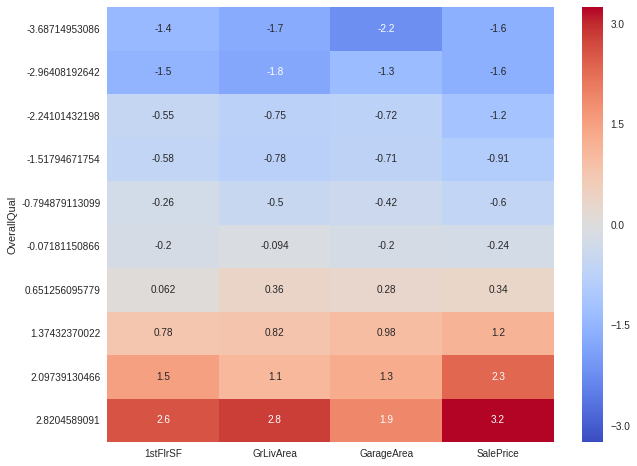

In [115]:
#sns.heatmap(df[feat].drop('SalePrice',axis=1).groupby('OverallQual').mean(),cmap='coolwarm')
plt.figure(figsize=(10,8))
sns.heatmap(dfr[feat].groupby('OverallQual').mean(),cmap='coolwarm',annot=True)
#Heatmap of z-score - looks like a big jump in higher quality houses

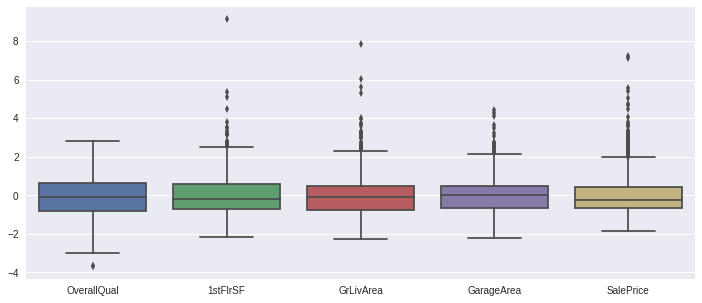

In [126]:
plt.figure(figsize=(12,5))
sns.boxplot(data=dfr)

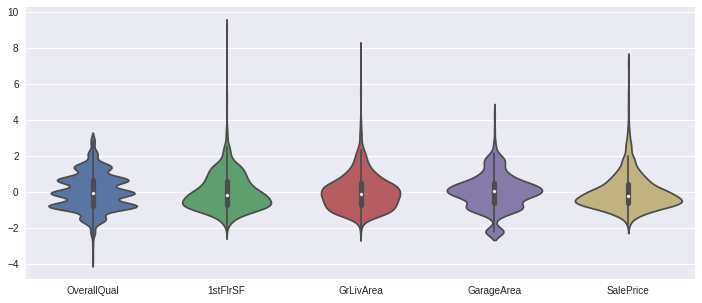

In [125]:
plt.figure(figsize=(12,5))
sns.violinplot(data=dfr)

In [100]:
#fig, axes = plt.subplots(2,5)

#for ax,num in enumerate(axes):
#    ax.plot()
    
#plt.tight_layout()